In [36]:
import matplotlib.pyplot as plt

from series2graph import *
import pandas as pd
import numpy as np
import sys  
sys.path.insert(0, '../src/hackathon')

from s2g_wrapper import *

In [102]:
#index = 4
ucols = [0,4]
ucols.append(index)
df = pd.read_csv("../DATA/8033.csv",header=None,usecols=ucols)
df[0] = pd.to_datetime(df[0])
print(df.head())
print('data shape:\n', df.shape)



                          0         4
0 2021-02-20 00:01:54+00:00  0.185465
1 2021-02-20 00:06:57+00:00  0.202147
2 2021-02-20 00:11:53+00:00  0.183439
3 2021-02-20 00:16:52+00:00  0.188730
4 2021-02-20 00:21:53+00:00  0.217614
data shape:
 (8757, 2)


757

In [129]:
pattern_length = 75
query_length = 100

s2gw = S2gWrapper(df,query_length,pattern_length)
scores = s2gw.calc(4)
len(scores)

555

In [127]:
threshold = 0.8
anom_val = [];
anom_score = [];
for i in range(len(scores)):
    if(scores[i] > threshold):
        anom_val.append(df[4].values[i])
        anom_score.append(scores[i])
    else: 
        anom_val.append(np.nan)
        anom_score.append(np.nan)

len(anom_val)   

645

(0.0, 645.0)

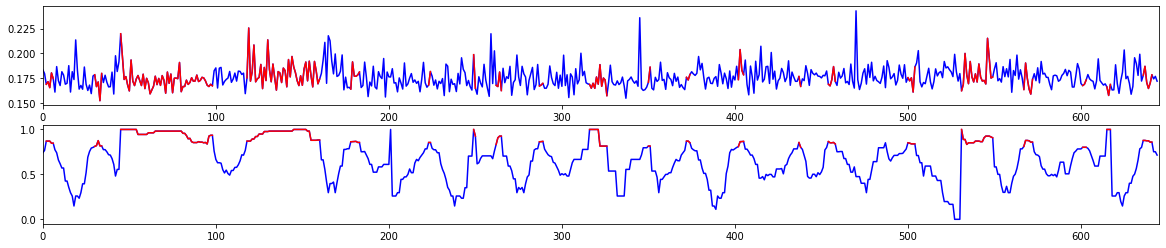

In [128]:
fig,ax = plt.subplots(2,1,figsize=(20,4))
ax[0].plot(df[4].values[0:len(anom_val)],color='blue')
ax[0].plot(anom_val[0:len(anom_val)],color='red')

ax[1].plot(scores,color='blue')
ax[1].plot(anom_score,color='red')
ax[0].set_xlim(0,len(anom_score))
ax[1].set_xlim(0,len(anom_score))